In [2]:
!pip install kaggle

# Handle missing values using mean/median/imputation.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [8]:
# loading the dataset to a pandas DataFrame
dataset= pd.read_csv("/content/Titanic-Dataset.csv")

In [9]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
dataset.shape

(891, 12)

In [11]:
dataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# central tendencies
1. mean
2. median
3. mode

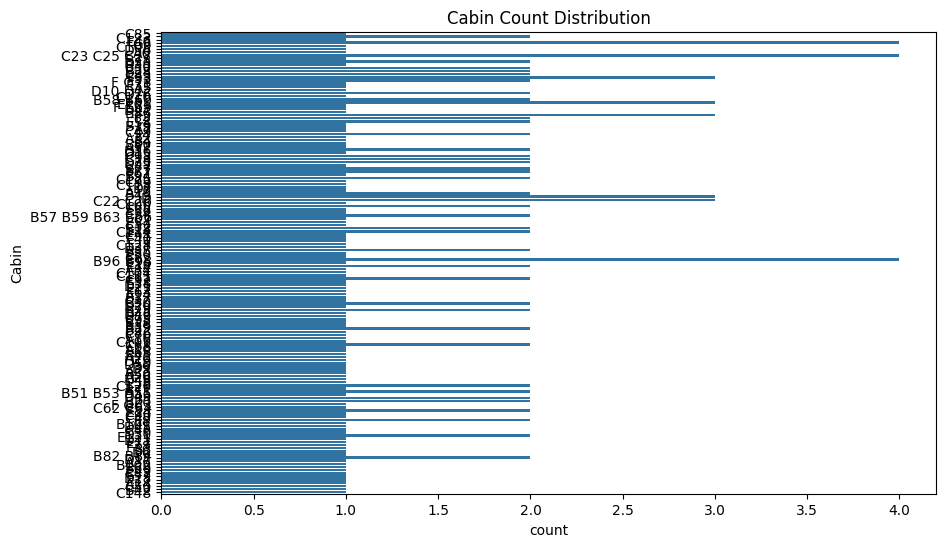

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(y=dataset['Cabin'])  # y-axis will show each unique Cabin, good if there are many categories
plt.title('Cabin Count Distribution')
plt.show()


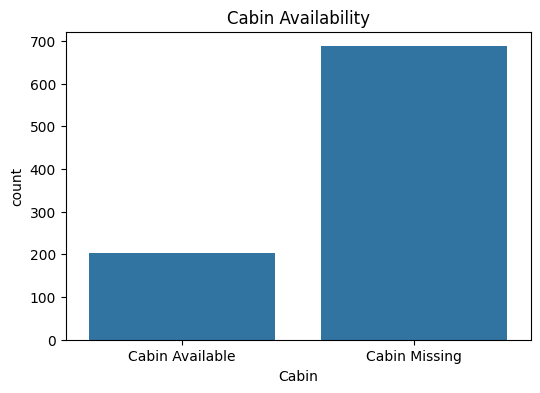

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x=dataset['Cabin'].isnull())
plt.xticks([0, 1], ['Cabin Available', 'Cabin Missing'])
plt.title('Cabin Availability')
plt.show()


In [17]:
dataset['Cabin'].mode()


,Cabin
0,B96 B98
1,C23 C25 C27
2,G6


In [24]:

import pandas as pd


cabin_mode = dataset['Cabin'].mode()[0]

dataset['Cabin'].fillna(cabin_mode, inplace=True)



In [25]:
dataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


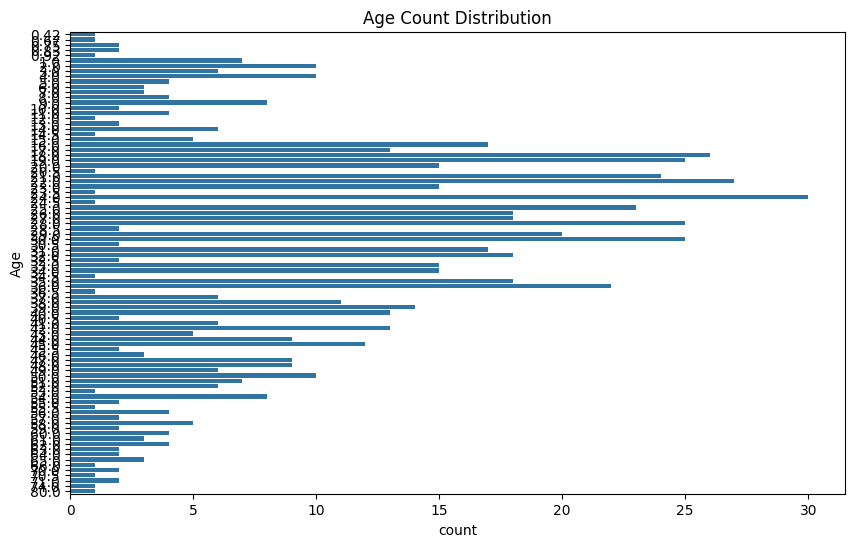

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(y=dataset['Age'])  # y-axis will show each unique Cabin, good if there are many categories
plt.title('Age Count Distribution')
plt.show()


In [22]:
dataset['Age'].fillna(dataset['Age'].median(),inplace=True)

/tmp/ipython-input-22-1263768913.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Age'].fillna(dataset['Age'].median(),inplace=True)


In [23]:
dataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [30]:

import pandas as pd


cabin_mode = dataset['Embarked'].mode()[0]

dataset['Embarked'].fillna(cabin_mode, inplace=True)




In [28]:
dataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# Convert categorical features into numerical using encoding.

In [31]:
# finding the count of difffernt lables in Embarked column
dataset['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [35]:
# load the lable Encoder function
label_encoder = LabelEncoder()

In [37]:
labels = label_encoder.fit_transform(dataset.Embarked)

In [38]:
# APPENDING THE LABELS TO THE DATAFRAME
dataset['Target'] = labels

In [39]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Target
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,2


In [41]:
import pandas as pd


pd.set_option('display.max_rows', 20)

print(dataset)


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

 HERE
  C >>>> 0
  Q >>>> 1
  S >>>> 2


# Normalize/standardize the numerical features.

In [47]:
 # NORMALIZATION OF CODE

 from sklearn.preprocessing import MinMaxScaler
Age = dataset.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
dataset[Age] = scaler.fit_transform(dataset[Age])
print(dataset.head())

   PassengerId  Survived  Pclass  \
0     0.000000       0.0     1.0   
1     0.001124       1.0     0.0   
2     0.002247       1.0     1.0   
3     0.003371       1.0     0.0   
4     0.004494       0.0     1.0   

                                                Name     Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  0.271174  0.125   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  0.472229  0.125   
2                             Heikkinen, Miss. Laina  female  0.321438  0.000   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  0.434531  0.125   
4                           Allen, Mr. William Henry    male  0.434531  0.000   

   Parch            Ticket      Fare    Cabin Embarked  Target  
0    0.0         A/5 21171  0.014151  B96 B98        S     1.0  
1    0.0          PC 17599  0.139136      C85        C     0.0  
2    0.0  STON/O2. 3101282  0.015469       G6        S     1.0  
3    0.0            113803  0.103644

In [45]:
# Standardization Code ( z score scalling )

from sklearn.preprocessing import StandardScaler

Age = dataset.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
dataset[Age] = scaler.fit_transform(dataset[Age])

print(dataset.head())


   PassengerId  Survived    Pclass  \
0    -1.730108 -0.789272  0.827377   
1    -1.726220  1.266990 -1.566107   
2    -1.722332  1.266990  0.827377   
3    -1.718444  1.266990 -1.566107   
4    -1.714556 -0.789272  0.827377   

                                                Name     Sex       Age  \
0                            Braund, Mr. Owen Harris    male -0.565736   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  0.663861   
2                             Heikkinen, Miss. Laina  female -0.258337   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  0.433312   
4                           Allen, Mr. William Henry    male  0.433312   

      SibSp     Parch            Ticket      Fare    Cabin Embarked    Target  
0  0.432793 -0.473674         A/5 21171 -0.502445  B96 B98        S  0.585954  
1  0.432793 -0.473674          PC 17599  0.786845      C85        C -1.942303  
2 -0.474545 -0.473674  STON/O2. 3101282 -0.488854       G6        S  0.585954  
3  0.4

In [48]:
 # NORMALIZATION OF CODE

 from sklearn.preprocessing import MinMaxScaler
Fare = dataset.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
dataset[Fare] = scaler.fit_transform(dataset[Fare])
print(dataset.head())

   PassengerId  Survived  Pclass  \
0     0.000000       0.0     1.0   
1     0.001124       1.0     0.0   
2     0.002247       1.0     1.0   
3     0.003371       1.0     0.0   
4     0.004494       0.0     1.0   

                                                Name     Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  0.271174  0.125   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  0.472229  0.125   
2                             Heikkinen, Miss. Laina  female  0.321438  0.000   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  0.434531  0.125   
4                           Allen, Mr. William Henry    male  0.434531  0.000   

   Parch            Ticket      Fare    Cabin Embarked  Target  
0    0.0         A/5 21171  0.014151  B96 B98        S     1.0  
1    0.0          PC 17599  0.139136      C85        C     0.0  
2    0.0  STON/O2. 3101282  0.015469       G6        S     1.0  
3    0.0            113803  0.103644

In [49]:
# Standardization Code ( z score scalling )

from sklearn.preprocessing import StandardScaler

Fare = dataset.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
dataset[Fare] = scaler.fit_transform(dataset[Fare])

print(dataset.head())

   PassengerId  Survived    Pclass  \
0    -1.730108 -0.789272  0.827377   
1    -1.726220  1.266990 -1.566107   
2    -1.722332  1.266990  0.827377   
3    -1.718444  1.266990 -1.566107   
4    -1.714556 -0.789272  0.827377   

                                                Name     Sex       Age  \
0                            Braund, Mr. Owen Harris    male -0.565736   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  0.663861   
2                             Heikkinen, Miss. Laina  female -0.258337   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  0.433312   
4                           Allen, Mr. William Henry    male  0.433312   

      SibSp     Parch            Ticket      Fare    Cabin Embarked    Target  
0  0.432793 -0.473674         A/5 21171 -0.502445  B96 B98        S  0.585954  
1  0.432793 -0.473674          PC 17599  0.786845      C85        C -1.942303  
2 -0.474545 -0.473674  STON/O2. 3101282 -0.488854       G6        S  0.585954  
3  0.4

# Visualize outliers using boxplots and remove them.

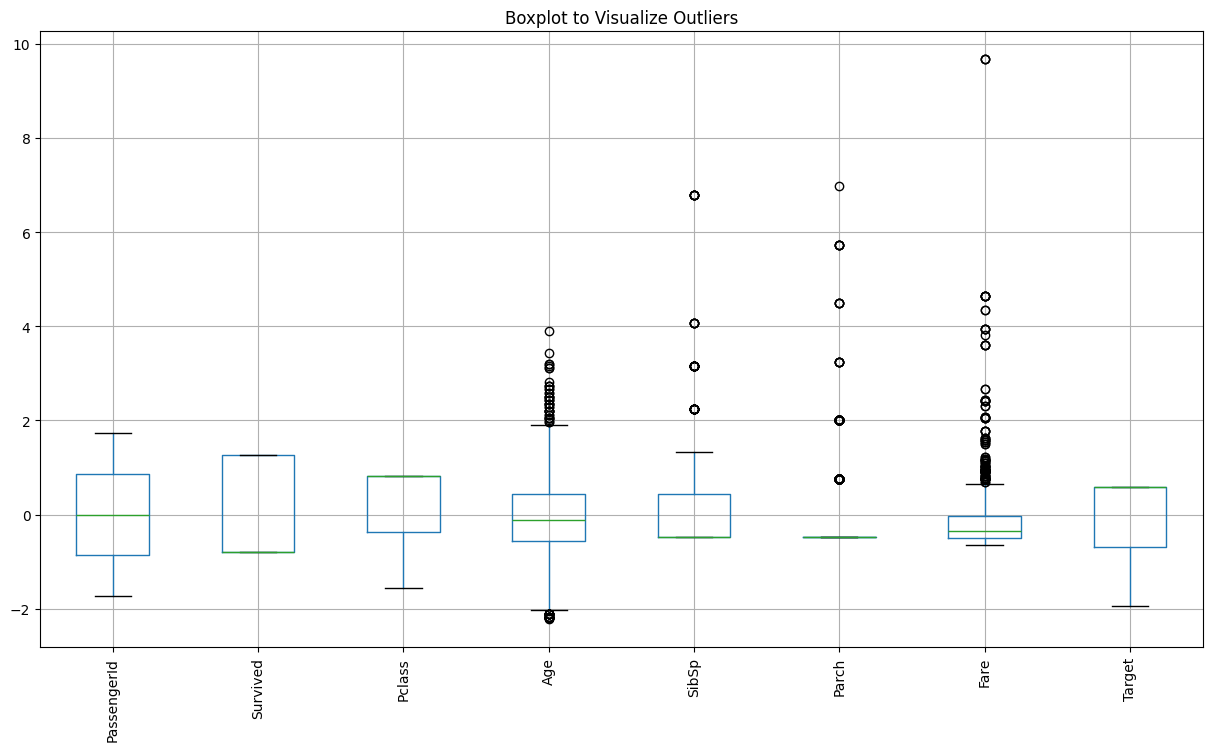

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
Fare = dataset.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots for all numerical columns
plt.figure(figsize=(15, 8))
dataset[Fare].boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot to Visualize Outliers')
plt.show()


In [52]:
import numpy as np

# Loop through each numerical column
for col in Fare:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove rows where column value is outside the bounds
    dataset = dataset[(dataset[col] >= lower_bound) & (dataset[col] <= upper_bound)]

# Dataset now has outliers removed
print(dataset.shape)


(218, 13)


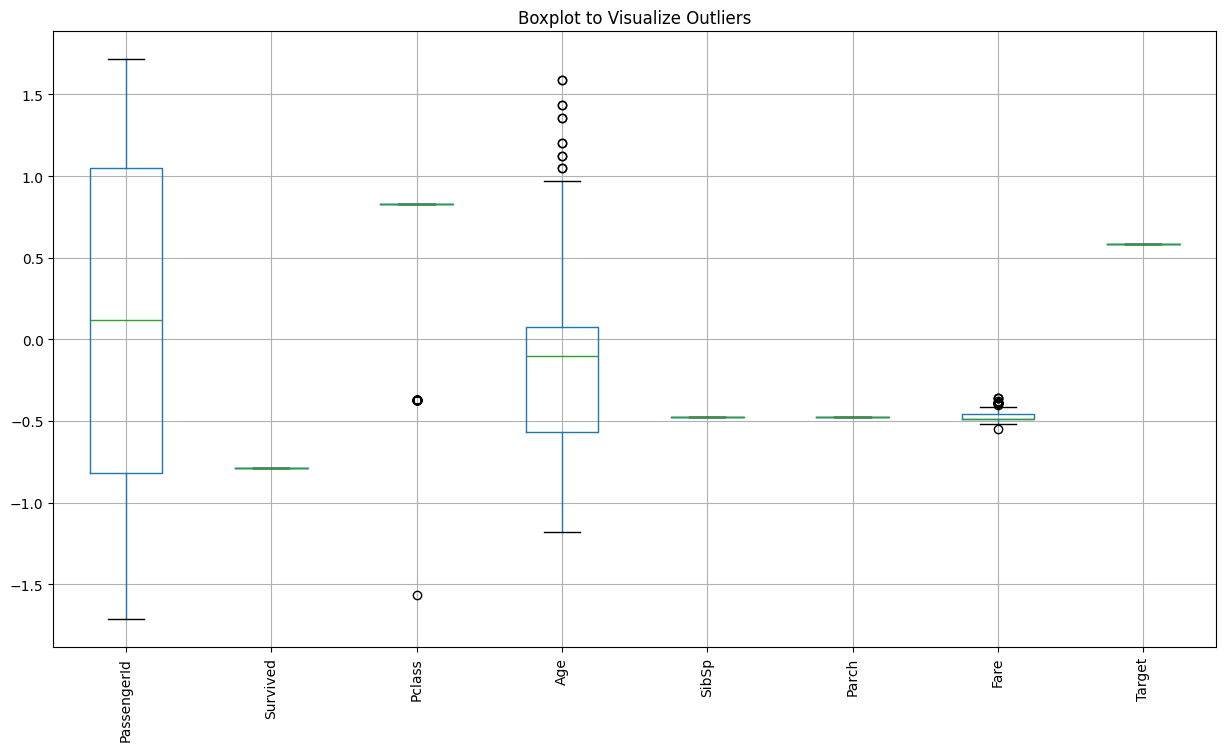

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
Age = dataset.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots for all numerical columns
plt.figure(figsize=(15, 8))
dataset[Age].boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot to Visualize Outliers')
plt.show()

In [54]:
import numpy as np


for col in Age:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove rows where column value is outside the bounds
    dataset = dataset[(dataset[col] >= lower_bound) & (dataset[col] <= upper_bound)]

# Dataset now has outliers removed
print(dataset.shape)

(111, 13)
